# Ridge & Lasso Regression

- Regulation is a **technique to reduce overfitting** by penalizing large coefficients.
- instead of only minimizing error, we also control **model complexity**. <br>
              <center>$\mathcal{Loss} = \text{Error} + \text{Penality}$

## Why Regulation is needed
- Too many features
- Polynomial regression
- Multicollinearity
- Noisy Data

## Types of Regulization
1. L1 Regulization (Lasso Regression)
2. L2 Regulization (Ridge Regression)
3. Elastic Net (L1 +L2)

### 1. Ridge Regression - (L2 Regulization)
- Ridge Regression is a regularization technique used to reduce overfitting by adding a penalty term based on the square of coefficients to the loss function. <br>
                       <center>$\mathcal{Loss} = \text{MSE} + \lambda \sum_{} W^2$

#### Why Ridge Regression is Needed
- Linear and Polynomial model tend to overfit.
- Large coefficients make the model unstable.
- Multicollinearity causes coefficient fluctuation.

**Note :**
- Ridge controls model complexity.

### lasso  Regression (L1 Regulization)
- Lasso Regression is a regulization technique used to reduce overfitting by adding penality based on the absolute value of coefficients, which can force some coefficients to become exactly zero.
- LASSO: Least Absolute Shrinkage and selection Operator.
<center>$\mathcal{Loss} = \text{MSE} + \lambda \sum \lvert W \lvert$

### Why Lasso Regresssion is needed
- Some datasets contains irrelevent or noisy features.
- Too many features increase model complexity.
- Difficult to interpret models with many coefficients.

**Note :**
- Lasso simplifies the model by removing unnecessary features

### Use Ridge when:
- Many correlated features
- All variables are important

### Use Lasso when:
- Too Many Features
- Need feature selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = {
    "Area": [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700],
    "Bedrooms": [1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    "Bathrooms": [1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
    "Age": [15, 12, 10, 8, 6, 5, 4, 3, 2, 1],
    "Distance_City": [15, 14, 13, 12, 10, 9, 8, 7, 6, 5],
    "Price": [40, 50, 55, 60, 70, 75, 80, 90, 95, 100]
}

df = pd.DataFrame(data)

In [3]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [7]:
y_train_pred_lin = linear.predict(X_train_scaled)
y_test_pred_lin = linear.predict(X_test_scaled)

In [8]:
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)

In [9]:
print("Linear Regression")
print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Linear Regression
Train MSE: 1.5867373636445494e-28
Test MSE: 1.5146129380243427e-28


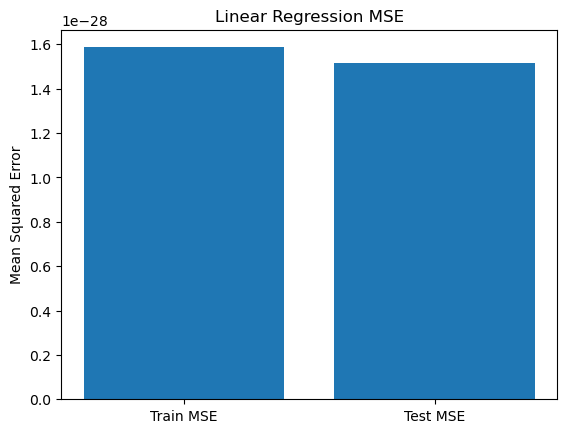

In [10]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_lin, test_mse_lin])
plt.title("Linear Regression MSE")
plt.ylabel("Mean Squared Error")
plt.show()

### Ridge Regression (L2)

In [11]:
ridge = Ridge(alpha=1.5)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1.5)

In [12]:
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

In [13]:
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

In [14]:
print("\nRidge Regression")
print("Train MSE:", train_mse_ridge)
print("Test MSE:", test_mse_ridge)


Ridge Regression
Train MSE: 2.7831951925749037
Test MSE: 2.2899991249782787


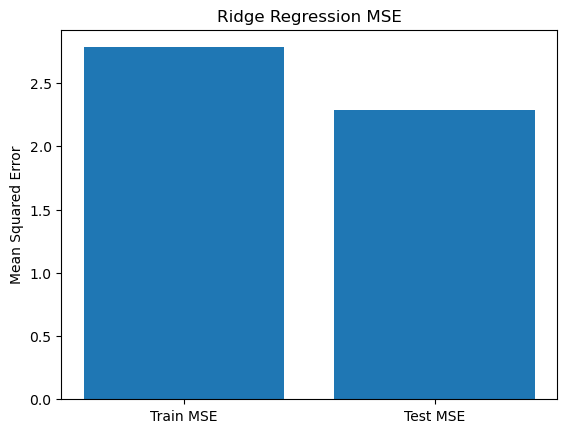

In [15]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_ridge, test_mse_ridge])
plt.title("Ridge Regression MSE")
plt.ylabel("Mean Squared Error")
plt.show()

In [16]:
X_plot = pd.DataFrame({
    "Area": np.linspace(df["Area"].min(), df["Area"].max(), 100),
    "Bedrooms": df["Bedrooms"].mean(),
    "Bathrooms": df["Bathrooms"].mean(),
    "Age": df["Age"].mean(),
    "Distance_City": df["Distance_City"].mean()
})

X_plot_scaled = scaler.transform(X_plot)

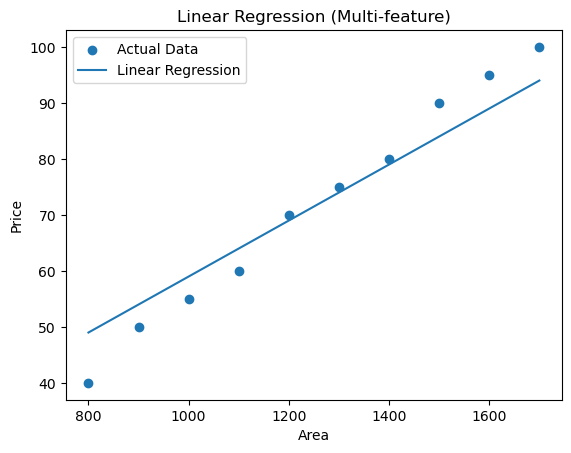

In [17]:
y_line_linear = linear.predict(X_plot_scaled)

plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line_linear, label="Linear Regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression (Multi-feature)")
plt.legend()
plt.show()

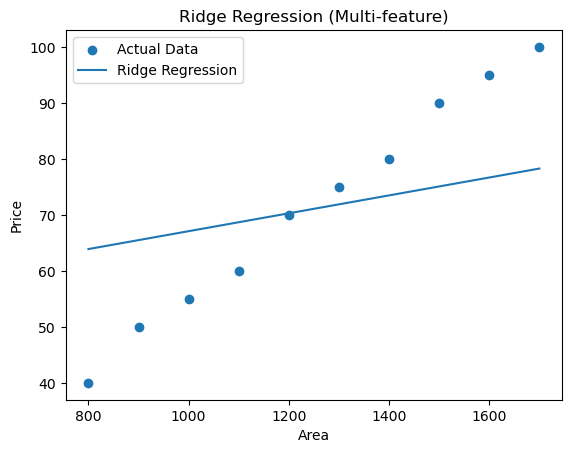

In [18]:
y_line_ridge = ridge.predict(X_plot_scaled)

plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line_ridge, label="Ridge Regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Ridge Regression (Multi-feature)")
plt.legend()
plt.show()

### Lasso Regression (L1)

In [19]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.5)

In [20]:
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

In [21]:
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

In [22]:
print("\nLasso Regression")
print("Train MSE:", train_mse_lasso)
print("Test MSE:", test_mse_lasso)


Lasso Regression
Train MSE: 0.25398323418235924
Test MSE: 0.21514810501608903


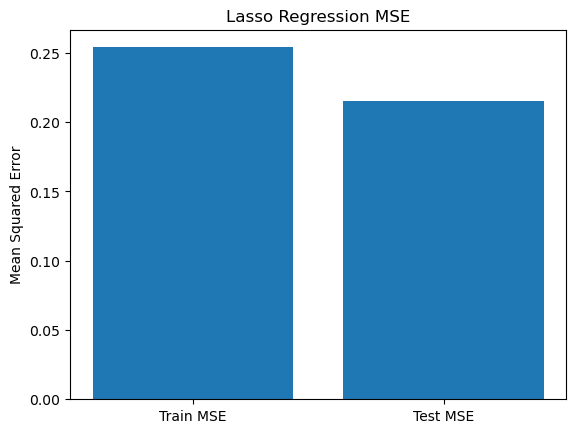

In [23]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_lasso, test_mse_lasso])
plt.title("Lasso Regression MSE")
plt.ylabel("Mean Squared Error")
plt.show()

In [24]:
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso Coefficients:")
print(lasso_coefficients)


Lasso Coefficients:
Area             14.096252
Bedrooms          4.890193
Bathrooms         0.000000
Age              -0.000000
Distance_City    -0.012063
dtype: float64


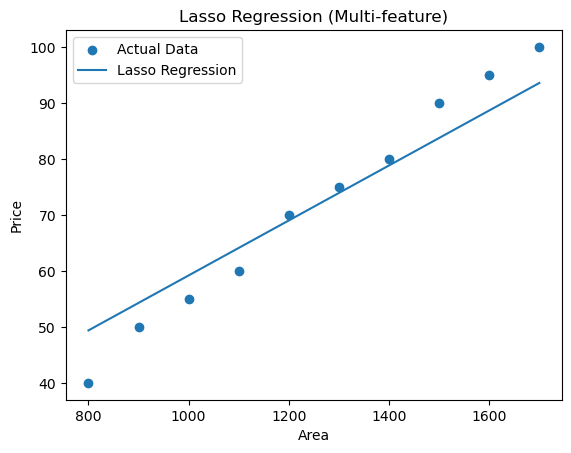

In [25]:
y_line_lasso = lasso.predict(X_plot_scaled)

plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line_lasso, label="Lasso Regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-feature)")
plt.legend()
plt.show()